In [3]:
from keras import models, layers
from keras.datasets import mnist
from keras.datasets import  imdb
from tensorflow.python.keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random
#Example 1

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
network.add(layers.Dense(3, activation="relu"))
network.add(layers.Dense(10, activation="softmax"))

In [13]:
network.compile(optimizer="rmsprop",
                loss="categorical_crossentropy", metrics=["accuracy"])
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 1.3330 - accuracy: 0.4609
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4150 - accuracy: 0.9055
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2718 - accuracy: 0.9359
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2115 - accuracy: 0.9487
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1625 - accuracy: 0.9598


In [4]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 814us/step - loss: 0.0661 - accuracy: 0.9803


Model prediction: 6


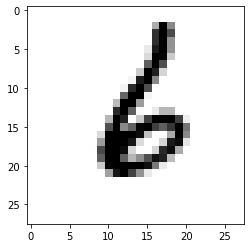

In [5]:
image = train_images_raw[random.randint(0,len(train_images_raw))]
prediction = network.predict(image.reshape(1,28*28))
print(f"Model prediction: {np.where(prediction)[1][0]}")
plt.imshow(image, cmap="binary")
plt.show()
